Tim Smith

2019.09.25

# Compare Hovmöller plots between experiments

## Showing zonal mean -vs- avg seasonal cycle for
- Precip
- P-E
- Surface temperature
- Specific humidity

In [1]:
import os
import sys
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import glob
import dask.array as da
from copy import deepcopy

# My functions
import ds_utils as dsu
import plotHovmoller as hov

In [2]:
# Ctrl dataset
data_dir = '/Users/tim/work/results/acdc/half_ocean_newbucket_0qflux_control'
globname = data_dir + '/*/*.nc'
file_list = glob.glob(globname)
file_list = sorted(file_list)
ds_ctrl = dsu.load_dataset(file_list)

# Same albedo dataset
data_dir = '/Users/tim/work/results/acdc/half_ocean_newbucket_0qflux_same_albedo_control'
globname = data_dir + '/*/*.nc'
file_list = glob.glob(globname)
file_list = sorted(file_list)
ds_alb = dsu.load_dataset(file_list)

In [3]:
# Drop first 8 years of spinup
ds_ctrl = ds_ctrl.where(ds_ctrl['time'].dt.year.isin(range(9,11)),drop=True)

# Compute climatology
ds_ctrl_clim = ds_ctrl.groupby('time.month').mean('time')
ds_alb_clim = ds_alb.groupby('time.month').mean('time')

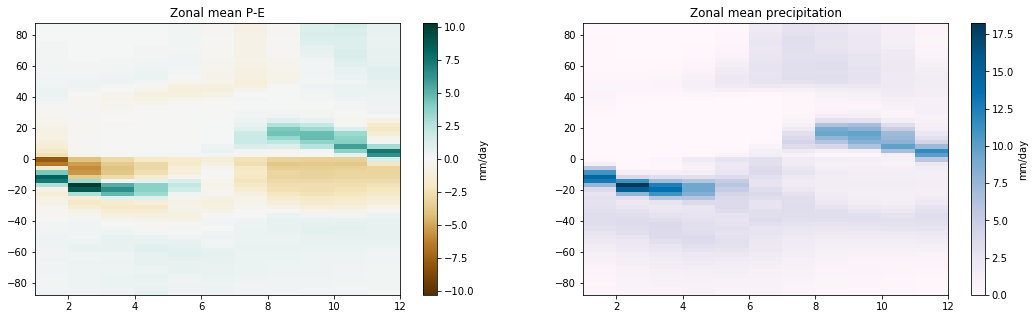

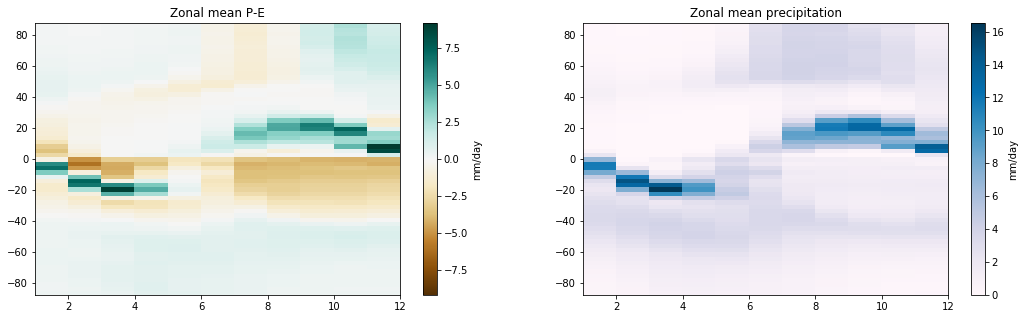

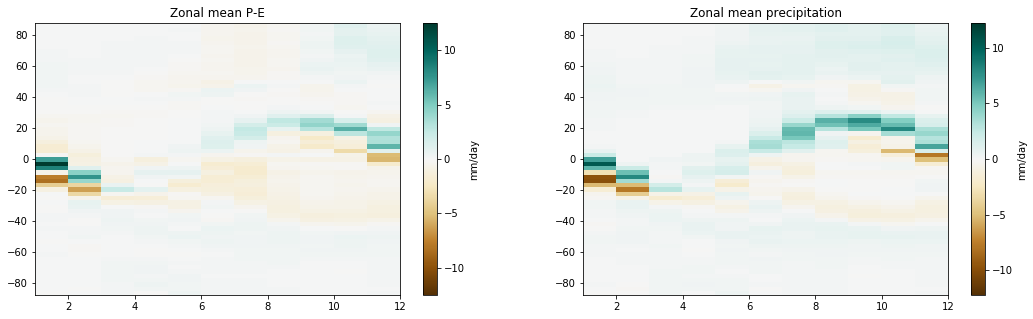

In [4]:
hov.plotPrecip(ds_ctrl_clim)
hov.plotPrecip(ds_alb_clim)
hov.plotPrecip(ds_alb_clim-ds_ctrl_clim)

In [ ]:
hov.plotTempAndVel(ds_ctrl_clim)
hov.plotTempAndVel(ds_alb_clim)
hov.plotTempAndVel(ds_alb_clim-ds_ctrl_clim)

In [ ]:
hov.plotHumidity(ds_ctrl_clim)
hov.plotHumidity(ds_alb_clim)
hov.plotHumidity(ds_alb_clim-ds_ctrl_clim)

In [ ]:
hov.plotSLP(ds_ctrl_clim)
hov.plotSLP(ds_alb_clim)
hov.plotSLP(ds_alb_clim-ds_ctrl_clim)